# Speech to text with Youtube and Twitter video's

Download a video from youtube and do S2T with it!
Mind you: this only works in practice for short (e.g. <1 minute) video's!

source: https://towardsdatascience.com/extracting-speech-from-video-using-python-f0ec7e312d38

### Contents
0. Install packages
1. Speech to text for Youtube Video's
2. Speech to text for Twitter Video's


## 0. Install packages

In [1]:
#download youtube video's
!pip install --upgrade youtube-dl

     |████████████████████████████████| 1.9 MB 6.4 MB/s eta 0:00:01


In [42]:
!pip show youtube-dl

Name: youtube-dl
Version: 2021.12.17
Summary: YouTube video downloader
Home-page: https://github.com/ytdl-org/youtube-dl
Author: Ricardo Garcia
Author-email: ytdl@yt-dl.org
License: Unlicense
Location: c:\users\michiel\anaconda3\lib\site-packages
Requires: 
Required-by: 


In [8]:
#convert movie to wav
!pip3 install moviepy

     |████████████████████████████████| 388 kB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 22.5 MB 18.3 MB/s eta 0:00:01
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110743 sha256=c5ffacd182137e85e15cc4b7b557d6cdc72132b6a84f8a36559156935541c976
  Stored in directory: /Users/michielbontenbal/Library/Caches/pip/wheels/29/15/e4/4f790bec6acd51a00b67e8ee1394f0bc6e0135c315f8ff399a
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [20]:
!pip install translators --upgrade

     |████████████████████████████████| 58 kB 9.9 MB/s  eta 0:00:01
     |████████████████████████████████| 4.6 MB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 3.4 MB/s  eta 0:00:01
     |████████████████████████████████| 76 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 22.1 MB/s eta 0:00:01
     |████████████████████████████████| 95 kB 9.8 MB/s  eta 0:00:01
     |████████████████████████████████| 52 kB 3.3 MB/s  eta 0:00:01
  Created wheel for PyExecJS: filename=PyExecJS-1.5.1-py3-none-any.whl size=14598 sha256=80f2ab65bcca8839ea47dd7c01326ed0dc70d1d225ddccb9780b88cddc008b9f
  Stored in directory: /Users/michielbontenbal/Library/Caches/pip/wheels/5b/ac/94/92a4835bff6f53c3faa26411e9db1a879d6e662c75b18a9603
Successfully built PyExecJS
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: lxml
    Found exist

In [17]:
pip install speechrecognition

     |████████████████████████████████| 32.8 MB 19.4 MB/s eta 0:00:01�████████████████            | 20.4 MB 19.4 MB/s eta 0:00:01     |██████████████████████▉         | 23.4 MB 19.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## 1. Speech to text for Youtube video's

In [2]:
video = input('Please provide the Youtube URL: ')

Please provide the Youtube URL: https://www.youtube.com/watch?v=BQ4yd2W50No


In [3]:
video

'https://www.youtube.com/watch?v=BQ4yd2W50No'

In [20]:
#source: https://github.com/ytdl-org/youtube-dl#embedding-youtube-dl
from __future__ import unicode_literals
import youtube_dl

ydl_opts = {}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([video])

[youtube] BQ4yd2W50No: Downloading webpage


[download] Do. Or do not. There is no try.-BQ4yd2W50No.mkv has already been downloaded and merged


In [46]:
from glob import glob
mp4_files = glob('*.mp4')
mp4_files

['Do. Or do not. There is no try.-BQ4yd2W50No.mp4',
 "NEXTA - 'Rescuers are trying to get survivors from under the rubble of the collapsed roof of the shopping center,' Anton Gerashchenko reports from the scene.-1541480740180860928.mp4",
 'output.mp4',
 'sample.mp4',
 'Street - 22516.mp4',
 'Visegrád 24 - Ukrainian man finds a drunk Russian soldier.  Via @WarNewsPL1-1541178599918673927.mp4',
 "youtube-dl test video ''_ä↭𝕐-BaW_jenozKc.mp4"]

In [49]:
import IPython
IPython.display.Video("Do. Or do not. There is no try.-BQ4yd2W50No.mp4")

In [1]:
#convert to wav file format for best result
import moviepy.editor as mp
clip = mp.VideoFileClip(r"Do. Or do not. There is no try.-BQ4yd2W50No.mp4") 
 
clip.audio.write_audiofile(r"Yoda.wav")

MoviePy - Writing audio in Yoda.wav


MoviePy - Done.


In [9]:
audio_path = 'Yoda.wav'

In [10]:
import IPython
IPython.display.Audio(audio_path)

ValueError: rate must be specified when data is a numpy array or list of audio samples.

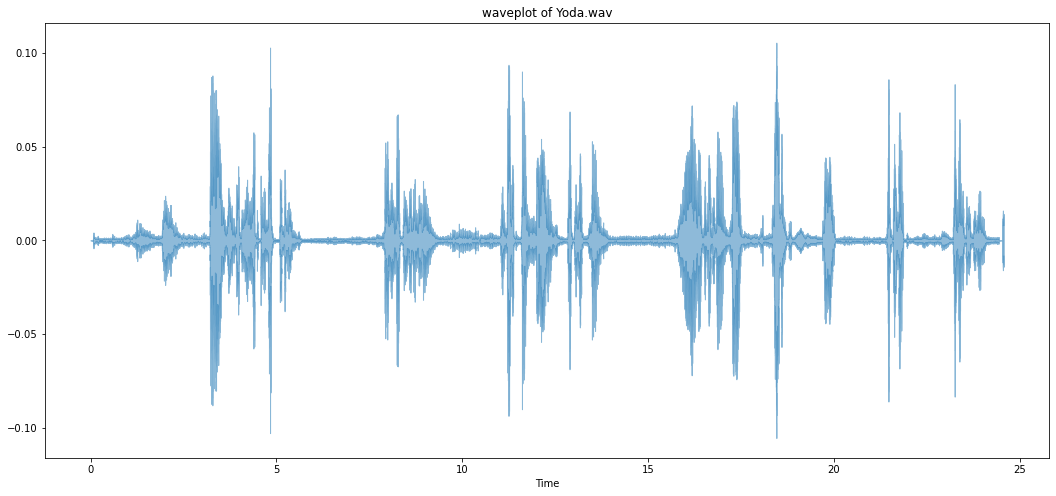

541769
CPU times: user 1.1 s, sys: 28.8 ms, total: 1.13 s
Wall time: 1.16 s


In [7]:
%%time
import librosa, librosa.display
import matplotlib.pyplot as plt
# load audio file
signal, sr = librosa.load(audio_path)
# plot waveform
plt.figure(figsize=(18, 8))
plt.title(f'waveplot of {audio_path}')
librosa.display.waveshow(signal, sr=sr, alpha=0.5)
plt.show()
print(len(signal))

In [8]:
import whisper

model = whisper.load_model("base")
result = model.transcribe(audio_path)
print(result["text"])

 Always with you, what cannot be done. Hear you nothing that I say. You must unlearn what you have learned. All right. I'll give it a try. No. Try not. Do or do not. There is no try.


In [ ]:
#as above but in one script
import whisper
from __future__ import unicode_literals
import youtube_dl
import os
from glob import glob
#getting the input
#video = input('Please provide the Youtube URL: ')

#downloading the video
#ydl_opts = {}
#with youtube_dl.YoutubeDL({'format':'133'}) as ydl:
#    ydl.download([video])
    
#selecting the latest file
mp4s = glob('*.mp4') 
latest_file = max(mp4s, key=os.path.getctime)
    
#doing the trascribing
model = whisper.load_model("base")
result = model.transcribe(latest_file)
print(result["text"])

In [ ]:
from glob import glob
mp4s = glob('*.mp4')
mp4s

In [30]:
latest_file = max(mp4s, key=os.path.getctime)
latest_file

'Do. Or do not. There is no try.-BQ4yd2W50No.mp4'

## 2. As above but now for twitter video's

Some provided examples are here:
- https://twitter.com/g900ap/status/1554442430673469441
- https://twitter.com/Bowenchris/status/1534784839941238784

In [2]:
tweet = input("please provide the URL of the tweet:")

please provide the URL of the tweet:https://twitter.com/JayinKyiv/status/1564190523849691139


In [3]:
tweet

'https://twitter.com/JayinKyiv/status/1564190523849691139'

In [4]:
from __future__ import unicode_literals
import youtube_dl

ydl_opts = {}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([tweet]) #drunk russian soldier https://twitter.com/visegrad24/status/1541178599918673927
    #https://twitter.com/nexta_tv/status/1541480740180860928

[twitter] 1564190523849691139: Downloading guest token
[twitter] 1564190523849691139: Downloading JSON metadata
[twitter] 1564190523849691139: Downloading m3u8 information
[download] Destination: Jay in Kyiv - Russians having a rough time holding Kherson.-1564190523849691139.mp4
[download] 100% of 781.16KiB in 00:0055MiB/s ETA 00:000


In [26]:
from glob import glob
mp4_files = glob('*.mp4')
mp4_files

['Do. Or do not. There is no try.-BQ4yd2W50No.mp4',
 'output.mp4',
 'Jay in Kyiv - Russians having a rough time holding Kherson.-1564190523849691139.mp4',
 "youtube-dl test video ''_ä↭𝕐-BaW_jenozKc.mp4",
 'Visegrád 24 - Ukrainian man finds a drunk Russian soldier.  Via @WarNewsPL1-1541178599918673927.mp4']

In [6]:
from IPython.display import Video
Video("Jay in Kyiv - Russians having a rough time holding Kherson.-1564190523849691139.mp4")

In [13]:
#convert to wav file format for best result
import moviepy.editor as mp
clip = mp.VideoFileClip(r"Jay in Kyiv - Russians having a rough time holding Kherson.-1564190523849691139.mp4") 
 
clip.audio.write_audiofile(r"converted2.wav")

MoviePy - Writing audio in converted2.wav


MoviePy - Done.


In [14]:
import IPython
IPython.display.Audio('Converted2.wav')

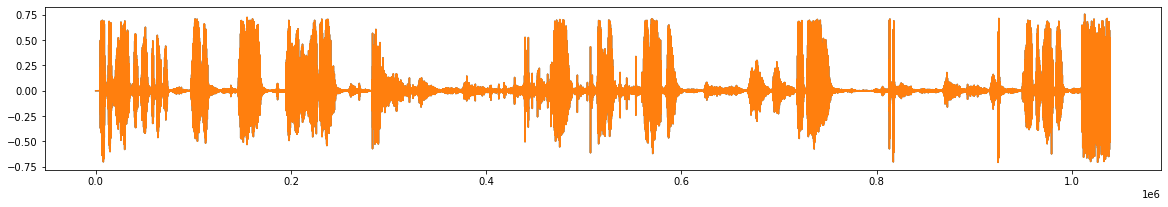

In [15]:
#visualise the wav file as a waveform (see how much noise is there)
import soundfile as sf
data, rate = sf.read('Converted2.wav')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

In [11]:
#do speech to text with OpenAI's whisper
import whisper
model = whisper.load_model("base")
result = model.transcribe('Jay in Kyiv - Russians having a rough time holding Kherson.-1564190523849691139.mp4')
print(result["text"])

 Тропы хуярых церстов, что только можно прорвали первую линию обороны. Хуярят станков авиации артиллерии. Двадцать девять авиации.


In [27]:
#translating it to English
import translators as ts
print(ts.google(result['text'])) # default: from_language='auto', to_language='en'

Fuck that you could have broken through the first line of defense to blaspheme the Aviation Air Aviation 29 aircraft


In [12]:
#translating it to English
import translators as ts
print(ts.google(result['text'])) # default: from_language='auto', to_language='en'

Using state North Holland server backend.


The trails of the cocks, that you could only broke through the first line of defense. Huyaryat artillery aviation machines. Twenty -nine aviation.
